In [25]:
# Remember to update your path
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("C:/Users/Gang/Documents/Qishi_QR")

from Backtesting.Vectorized.cross_compare import *
from Backtesting.Vectorized.models import *

from Utils.lm import gen_strategy, LM_model
#from Utils.MajorContract_Offsets import MajorContracts
from Utils.MajorContract_split import MajorContracts


import warnings
warnings.filterwarnings(action='ignore')


from config import AgConfig, BuConfig, RbConfig

def Generate_Direction(mj, threshold = np.linspace(1,15,num=(15.-1)/2+1)):
    result = pd.DataFrame(index=mj.index)
    for thx in threshold:
        result[round(thx,1)] = mj['LastPrice'].diff().apply(lambda x: 2 if x > thx 
                                            else (1 if x < -thx else 0))
    return result
 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


----

# 1. Price-change 

In [17]:
params.transition

{'1605': '2016-3-1',
 '1610': '2016-8-1',
 '1701': '2016-12-1',
 '1705': '2017-3-1'}

In [ ]:

# ====== Initial Configuration - Rb 5min ========
params = RbConfig(frequency=5)

mj5 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset)

mj_train_5, mj_test_5, ptb_5 = mj5.create_major_overlap()

PT_5 = Generate_Direction(mj_train_5)
Frequency_Count = PT_5.apply(pd.value_counts).T

Value_Prob_5 = PT_5.apply(pd.value_counts).T
Value_Prob_5 = Value_Prob_5.div(Value_Prob_5.sum(axis=1), axis=0)

In [ ]:
# ====== Initial Configuration - Rb 10min ========
params = RbConfig(frequency=10)

mj10 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset)

mj_train_10, mj_test_10, ptb_10 = mj10.create_major_overlap()

PT_10 = Generate_Direction(mj_train_10)
Frequency_Count = PT_10.apply(pd.value_counts).T

Value_Prob_10 = PT_10.apply(pd.value_counts).T
Value_Prob_10 = Value_Prob_10.div(Value_Prob_10.sum(axis=1), axis=0)

In [ ]:
# ====== Initial Configuration - Rb 15min ========
params = RbConfig(frequency=15)

mj15 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset)

mj_train_15, mj_test_15, ptb_15 = mj15.create_major_overlap()

PT_15 = Generate_Direction(mj_train_15)
Frequency_Count = PT_5.apply(pd.value_counts).T

Value_Prob_15 = PT_15.apply(pd.value_counts).T
Value_Prob_15 = Value_Prob_15.div(Value_Prob_15.sum(axis=1), axis=0)

In [30]:
mj_train_10.head()

,InstrumentID,Date,TimeStamp,LastPrice,HighPrice,LowPrice,Volume,Turnover,AccVolume,AccTurnover,...,BidVolume2,BidVolume3,BidVolume4,BidVolume5,Type,AveragePrice,UpperLimitPrice,LowerLimitPrice,UpdateTime,Direction
2016-01-04 09:00:06,rb1605,20160104.0,1.451869e+12,1840.0,1846.0,1821.0,1892.0,34837040.0,79590.0,1.456441e+09,...,0.0,0.0,0.0,0.0,-1.0,1829.0,1878.0,1699.0,09:00:06.000,0
2016-01-04 09:10:06,rb1605,20160104.0,1.451870e+12,1809.0,1846.0,1805.0,24.0,434140.0,1075224.0,1.956909e+10,...,0.0,0.0,0.0,0.0,-1.0,1820.0,1878.0,1699.0,09:10:06.000,1
2016-01-04 09:20:06,rb1605,20160104.0,1.451870e+12,1805.0,1846.0,1801.0,638.0,11515880.0,1599400.0,2.903941e+10,...,0.0,0.0,0.0,0.0,-1.0,1815.0,1878.0,1699.0,09:20:06.000,1
2016-01-04 09:30:06,rb1605,20160104.0,1.451871e+12,1808.0,1846.0,1801.0,26.0,470080.0,1871240.0,3.394645e+10,...,0.0,0.0,0.0,0.0,-1.0,1814.0,1878.0,1699.0,09:30:06.000,2
2016-01-04 09:40:06,rb1605,20160104.0,1.451872e+12,1802.0,1846.0,1801.0,28.0,504620.0,2145068.0,3.888673e+10,...,0.0,0.0,0.0,0.0,-1.0,1812.0,1878.0,1699.0,09:40:06.000,1


## 1.1 Compare the probability of price change

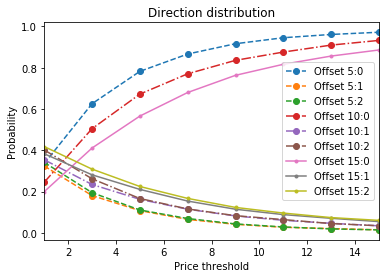

In [29]:
fig = plt.figure()
ax = plt.gca()
Value_Prob_5.plot(ax = ax, marker='o', style='--')
legend_5 = ['Offset 5:{}'.format(x) for x in [0,1,2]]
Value_Prob_10.plot(ax = ax, marker='o', style='-.')
legend_10 = ['Offset 10:{}'.format(x) for x in [0,1,2]]
Value_Prob_15.plot(ax = ax, marker='.')
legend_15 = ['Offset 15:{}'.format(x) for x in [0,1,2]]

plt.legend(legend_5+legend_10+legend_15)
ax.set_title('Direction distribution')
ax.set_ylabel('Probability')
ax.set_xlabel('Price threshold')

-----

# 2. Check the probability table

In [31]:
ptb_5_df = pd.concat(ptb_5)
ptb_5_df.index = ptb_5_df.index.droplevel(level=0)
ptb_5_df['len'] = ptb_5_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_5_df[ptb_5_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [ 0.66666667  0.33333333]

Prior length:3 	0,1,2: [ 0.55555556  0.38888889  0.05555556]

Prior length:4 	0,1,2: [ 0.61111111  0.37037037  0.01851852]

Prior length:5 	0,1,2: [ 0.47530864  0.4691358   0.05555556]

Prior length:6 	0,1,2: [ 0.44444444  0.42386831  0.13168724]

Prior length:7 	0,1,2: [ 0.36625514  0.32373114  0.31001372]

Prior length:8 	0,1,2: [ 0.55052583  0.24348422  0.20598994]


In [32]:
ptb_10_df = pd.concat(ptb_10)
ptb_10_df.index = ptb_10_df.index.droplevel(level=0)
ptb_10_df['len'] = ptb_10_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_10_df[ptb_10_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [ 0.66666667  0.33333333]

Prior length:3 	0,1,2: [ 0.55555556  0.38888889  0.05555556]

Prior length:4 	0,1,2: [ 0.61111111  0.35185185  0.03703704]

Prior length:5 	0,1,2: [ 0.48148148  0.41975309  0.09876543]

Prior length:6 	0,1,2: [ 0.38477366  0.35802469  0.25720165]

Prior length:7 	0,1,2: [ 0.50137174  0.26131687  0.23731139]

Prior length:8 	0,1,2: [ 0.7085048   0.15660722  0.13488797]


In [33]:
ptb_15_df = pd.concat(ptb_15)
ptb_15_df.index = ptb_15_df.index.droplevel(level=0)
ptb_15_df['len'] = ptb_15_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_15_df[ptb_15_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [ 0.5  0.5]

Prior length:3 	0,1,2: [ 0.5         0.44444444  0.05555556]

Prior length:4 	0,1,2: [ 0.55555556  0.38888889  0.05555556]

Prior length:5 	0,1,2: [ 0.41358025  0.41358025  0.17283951]

Prior length:6 	0,1,2: [ 0.37654321  0.33127572  0.29218107]

Prior length:7 	0,1,2: [ 0.60836763  0.21673525  0.17489712]

Prior length:8 	0,1,2: [ 0.77960677  0.11979881  0.10059442]


# 3. Check the generated signal

In [34]:
params = RbConfig(frequency=5)

slm_5 = ptb_5_df.groupby(['prior']).sum().reset_index()
slm_5['signal'] = slm_5.loc[:, '0':'2'].idxmax(axis=1)

signal_5 = MajorSeriesTest(mj_test_5, params.output_path, slm_5)
signal_5.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_5.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 5min
Prior length:2 	0,1,2: [ 0.75265554  0.24734446]
Prior length:3 	0,1,2: [ 0.54729388  0.45042994  0.00227618]
Prior length:4 	0,1,2: [ 0.53161356  0.46611027  0.00227618]
Prior length:5 	0,1,2: [ 0.55437532  0.43727871  0.00834598]
Prior length:6 	0,1,2: [ 0.53186646  0.4430956   0.02503794]
Prior length:7 	0,1,2: [ 0.46939808  0.45776429  0.07283763]


In [35]:
params = RbConfig(frequency=10)

slm_10 = ptb_10_df.groupby(['prior']).sum().reset_index()
slm_10['signal'] = slm_10.loc[:, '0':'2'].idxmax(axis=1)

signal_10 = MajorSeriesTest(mj_test_10, params.output_path, slm_10)
signal_10.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_10.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 10min
Prior length:2 	0,1,2: [ 0.51395813  0.48604187]
Prior length:3 	0,1,2: [ 0.74925224  0.24975075  0.00099701]
Prior length:4 	0,1,2: [  6.89930209e-01   3.09571286e-01   4.98504487e-04]
Prior length:5 	0,1,2: [ 0.61515454  0.36989033  0.01495513]
Prior length:6 	0,1,2: [ 0.48803589  0.46560319  0.04636092]
Prior length:7 	0,1,2: [ 0.46360917  0.4332004   0.10319043]


In [36]:
params = RbConfig(frequency=15)

slm_15 = ptb_15_df.groupby(['prior']).sum().reset_index()
slm_15['signal'] = slm_15.loc[:, '0':'2'].idxmax(axis=1)

signal_15 = MajorSeriesTest(mj_test_15, params.output_path, slm_15)
signal_15.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_15.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 15min
Prior length:2 	0,1,2: [ 0.51062215  0.48937785]
Prior length:3 	0,1,2: [ 0.53414264  0.46585736]
Prior length:4 	0,1,2: [ 0.54248862  0.45599393  0.00151745]
Prior length:5 	0,1,2: [ 0.59787557  0.37860395  0.02352049]
Prior length:6 	0,1,2: [ 0.48179059  0.45295903  0.06525038]
Prior length:7 	0,1,2: [ 0.47040971  0.40060698  0.12898331]


----
# Backtest

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.279064,0.006725,-0.002685,0.001591,0.000184,-0.025427,0.022876,-0.068492,0.592519,6.024596,2124,1.390049,0.637476
1,0.317284,0.007319,-0.003548,0.002244,0.000355,-0.026389,0.022876,-0.067237,0.632488,5.767003,1196,1.424508,0.628763
2,0.266939,0.004631,-0.002750,0.001648,0.000139,-0.025238,0.021793,-0.062051,0.599382,4.337003,1928,1.268590,0.621888
3,0.331895,0.005672,-0.002705,0.001792,0.000174,-0.024367,0.021793,-0.071542,0.662586,4.272061,1894,1.328948,0.609293
4,0.317012,0.003927,-0.002545,0.001930,0.000123,-0.024367,0.021793,-0.064821,0.758535,3.096660,1850,1.227749,0.569730
5,0.305579,0.002183,-0.002459,0.001960,0.000067,-0.029939,0.021793,-0.120578,0.797043,1.785758,1899,1.126600,0.553976
6,0.286769,-0.003092,-0.002527,0.002016,-0.000099,-0.024367,0.021793,-0.234881,0.798071,-2.695775,1816,0.820649,0.509912


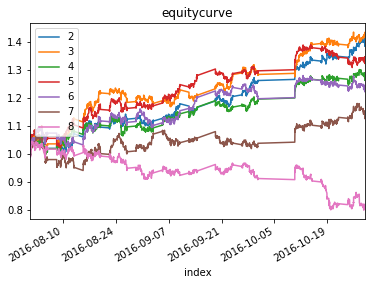

In [37]:
from config import RbConfig
params=RbConfig(frequency=5)

Rb_5_test = MajorSeriesTest(mj_test_5, params.output_path, slm_5 )
Rb_5_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Rb_5_test.run()
Rb_5_test.plot()
Rb_5_test.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.270851,0.005847,-0.003663,0.002178,0.000311,-0.023653,0.022433,-0.058661,0.594647,5.396838,1091,1.339124,0.654445
1,0.277602,0.005312,-0.003597,0.002177,0.000298,-0.023653,0.022433,-0.060376,0.605244,4.783438,1035,1.308071,0.671498
2,0.270600,0.006672,-0.003445,0.003126,0.000537,-0.023086,0.022433,-0.071584,0.907290,6.164082,720,1.386976,0.594444
3,0.297433,0.005981,-0.003164,0.002673,0.000358,-0.025613,0.022433,-0.071229,0.845002,5.027563,970,1.346924,0.587629
4,0.241369,0.003305,-0.003426,0.002884,0.000219,-0.024361,0.022433,-0.079515,0.841656,3.422687,876,1.191662,0.562785
5,0.232527,-0.000905,-0.003089,0.002660,-0.000052,-0.029328,0.016364,-0.122128,0.861031,-0.972589,1006,0.947533,0.514911
6,0.287412,0.000186,-0.003110,0.002865,0.000011,-0.025626,0.037461,-0.181504,0.921313,0.161658,938,1.010779,0.508529


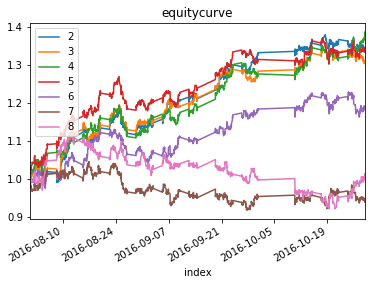

In [38]:
params=RbConfig(frequency=10)

Rb_10_test = MajorSeriesTest(mj_test_10, params.output_path, slm_10 )
Rb_10_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Rb_10_test.run()
Rb_10_test.plot()
Rb_10_test.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.269385,0.000458,-0.004849,0.002591,0.000039,-0.026029,0.015742,-0.127752,0.534271,0.424891,688,1.026555,0.635174
1,0.279136,0.001478,-0.004594,0.002724,0.000130,-0.026029,0.015742,-0.122379,0.593012,1.323615,658,1.085717,0.639818
2,0.279320,0.003120,-0.004789,0.002844,0.000275,-0.026029,0.015742,-0.093898,0.593835,2.792441,658,1.180957,0.644377
3,0.285430,-0.001937,-0.004693,0.002762,-0.000163,-0.035366,0.015742,-0.214264,0.588535,-1.696138,690,0.887682,0.598551
4,0.251586,0.001421,-0.004571,0.003295,0.000138,-0.025975,0.025238,-0.089740,0.720889,1.412033,596,1.082418,0.588926
5,0.282374,-0.000797,-0.004275,0.003373,-0.000072,-0.042391,0.021291,-0.161221,0.788962,-0.705237,644,0.953799,0.535714
6,0.255410,0.001389,-0.004589,0.003505,0.000139,-0.025176,0.023182,-0.099340,0.763719,1.359512,580,1.080558,0.572414


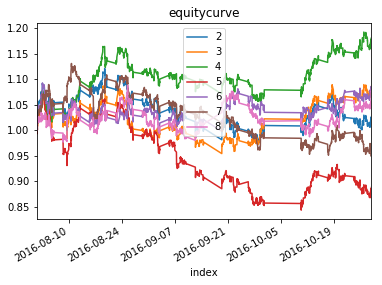

In [39]:
params=RbConfig(frequency=15)

Rb_15_test = MajorSeriesTest(mj_test_15, params.output_path, slm_15 )
Rb_15_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Rb_15_test.run()
Rb_15_test.plot()
Rb_15_test.performance